In [1]:
import pystac
import rioxarray

In [2]:
items = pystac.ItemCollection.from_file("search.json")

In [3]:
items

ID: S2A_31UFU_20200328_0_L2A
"Bounding Box: [4.814996623122647, 52.22257539160586, 6.1417542968794585, 53.228577890548]"
Datetime: 2020-03-28 10:46:21+00:00
datetime: 2020-03-28T10:46:21Z
platform: sentinel-2a
constellation: sentinel-2
instruments: ['msi']
gsd: 10
view:off_nadir: 0
proj:epsg: 32631
sentinel:utm_zone: 31


In [4]:
item = items[1]

In [5]:
item_href = item.assets["visual"].href

In [6]:
item_href

'https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/31/U/FU/2020/3/S2B_31UFU_20200326_0_L2A/TCI.tif'

In [7]:
true_color_image = rioxarray.open_rasterio(item_href)

In [8]:
true_color_image

<xarray.DataArray (band: 3, y: 10980, x: 10980)>
[361681200 values with dtype=uint8]
Coordinates:
  * band         (band) int32 1 2 3
  * x            (x) float64 6e+05 6e+05 6e+05 ... 7.098e+05 7.098e+05 7.098e+05
  * y            (y) float64 5.9e+06 5.9e+06 5.9e+06 ... 5.79e+06 5.79e+06
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:       Area
    OVR_RESAMPLING_ALG:  AVERAGE
    _FillValue:          0
    scale_factor:        1.0
    add_offset:          0.0

In [9]:
true_color_image.rio.crs

CRS.from_epsg(32631)

In [10]:
from pyproj import CRS

In [11]:
CRS(true_color_image.rio.crs)

<Derived Projected CRS: EPSG:32631>
Name: WGS 84 / UTM zone 31N
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: UTM zone 31N
- method: Transverse Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [12]:
import geopandas as gpd

In [13]:
cropfield = gpd.read_file('cropfield.shp')

In [14]:
cropfield

,category,gewas,gewascode,jaar,status,geometry
0,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((120154.932 495930.341, 120154.309 49..."
1,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((120101.483 496378.781, 120100.177 49..."
2,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((119858.185 496057.345, 119855.745 49..."
3,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((120168.354 496651.174, 120160.995 49..."
4,Grasland,"Grasland, natuurlijk. Hoofdfunctie landbouw.",331,2020,Definitief,"POLYGON ((119944.018 496061.229, 119924.704 49..."
...,...,...,...,...,...,...
4867,Grasland,"Grasland, natuurlijk. Hoofdfunctie landbouw.",331,2020,Definitief,"POLYGON ((133371.140 492631.152, 133363.203 49..."
4868,Grasland,"Grasland, natuurlijk. Hoofdfunctie landbouw.",331,2020,Definitief,"POLYGON ((133422.246 492887.057, 133420.130 49..."
4869,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((133554.659 492738.186, 133554.924 49..."
4870,Grasland,"Grasland, natuurlijk. Hoofdfunctie landbouw.",331,2020,Definitief,"POLYGON ((133434.981 492748.790, 133430.854 49..."


In [15]:
cropfield.crs

<Derived Projected CRS: EPSG:28992>
Name: Amersfoort / RD New
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: Netherlands - onshore, including Waddenzee, Dutch Wadden Islands and 12-mile offshore coastal zone.
- bounds: (3.2, 50.75, 7.22, 53.7)
Coordinate Operation:
- name: RD New
- method: Oblique Stereographic
Datum: Amersfoort
- Ellipsoid: Bessel 1841
- Prime Meridian: Greenwich

In [16]:
cropfield_trans = cropfield.to_crs(true_color_image.rio.crs)

In [17]:
cropfield_trans.crs

<Derived Projected CRS: EPSG:32631>
Name: WGS 84 / UTM zone 31N
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: UTM zone 31N
- method: Transverse Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [18]:
# true_color_image_trans = true_color_image.rio.reproject(cropfield.crs)

In [19]:
cropfield = cropfield.to_crs(true_color_image.rio.crs)

In [20]:
cropfield.crs

<Derived Projected CRS: EPSG:32631>
Name: WGS 84 / UTM zone 31N
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: UTM zone 31N
- method: Transverse Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [22]:
true_color_image.rio.clip_box?

Signature:
true_color_image.rio.clip_box(
    minx: float,
    miny: float,
    maxx: float,
    maxy: float,
    auto_expand: Union[bool, int] = False,
    auto_expand_limit: int = 3,
    crs: Optional[Any] = None,
) -> xarray.core.dataarray.DataArray
Docstring:
Clip the :obj:`xarray.DataArray` by a bounding box.

.. versionadded:: 0.12 crs

Parameters
----------
minx: float
    Minimum bound for x coordinate.
miny: float
    Minimum bound for y coordinate.
maxx: float
    Maximum bound for x coordinate.
maxy: float
    Maximum bound for y coordinate.
auto_expand: Union[bool, int]
    If True, it will expand clip search if only 1D raster found with clip.
auto_expand_limit: int
    maximum number of times the clip will be retried before raising
    an exception.
crs: :obj:`rasterio.crs.CRS`, optional
    The CRS of the bounding box. Default is to assume it is the same
    as the dataset.

Returns
-------
xarray.DataArray:
    The clipped object.
File:      c:\users\ouku\anaconda3\envs\

In [23]:
cropfield.total_bounds

array([ 626758.92477826, 5801978.3252512 ,  642583.33625691,
       5817705.26052953])

In [24]:
bounds = cropfield.total_bounds

In [26]:
true_color_image_clip = true_color_image.rio.clip_box(*bounds)

In [27]:
true_color_image_clip

<xarray.DataArray (band: 3, y: 1574, x: 1584)>
[7479648 values with dtype=uint8]
Coordinates:
  * band         (band) int32 1 2 3
  * x            (x) float64 6.268e+05 6.268e+05 ... 6.426e+05 6.426e+05
  * y            (y) float64 5.818e+06 5.818e+06 ... 5.802e+06 5.802e+06
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:       Area
    OVR_RESAMPLING_ALG:  AVERAGE
    scale_factor:        1.0
    add_offset:          0.0
    _FillValue:          0

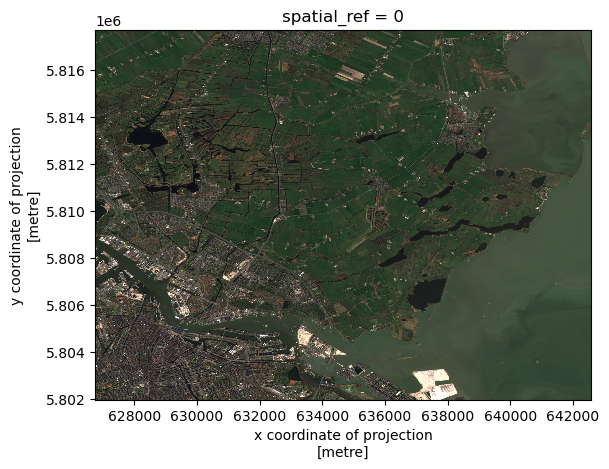

In [28]:
true_color_image_clip.plot.imshow()

In [29]:
from matplotlib import pyplot

<AxesSubplot: title={'center': 'spatial_ref = 0'}, xlabel='x coordinate of projection\n[metre]', ylabel='y coordinate of projection\n[metre]'>

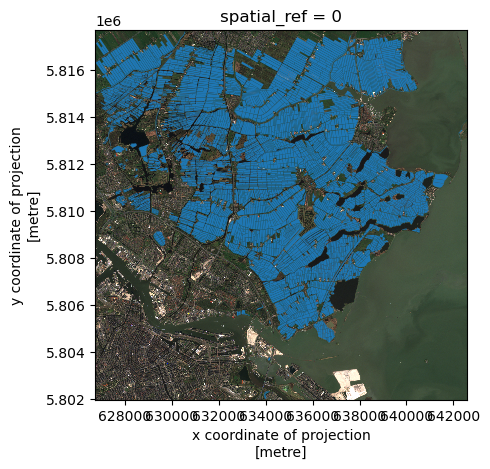

In [32]:
fig, ax = pyplot.subplots()
true_color_image_clip.plot.imshow(ax=ax)
cropfield.plot(ax=ax)

In [33]:
true_color_image_clip.rio.clip?

Signature:
true_color_image_clip.rio.clip(
    geometries: Iterable,
    crs: Optional[Any] = None,
    all_touched: bool = False,
    drop: bool = True,
    invert: bool = False,
    from_disk: bool = False,
) -> xarray.core.dataarray.DataArray
Docstring:
Crops a :obj:`xarray.DataArray` by geojson like geometry dicts.

Powered by `rasterio.features.geometry_mask`.

Examples:

    >>> geometry = ''' {"type": "Polygon",
    ...                 "coordinates": [
    ...                 [[-94.07955380199459, 41.69085871273774],
    ...                 [-94.06082436942204, 41.69103313774798],
    ...                 [-94.06063203899649, 41.67932439500822],
    ...                 [-94.07935807746362, 41.679150041277325],
    ...                 [-94.07955380199459, 41.69085871273774]]]}'''
    >>> cropping_geometries = [geojson.loads(geometry)]
    >>> xds = xarray.open_rasterio('cool_raster.tif')
    >>> cropped = xds.rio.clip(geometries=cropping_geometries, crs=4326)


.. versionadded:: 0

In [34]:
true_color_image_cropfield = true_color_image_clip.rio.clip(cropfield["geometry"])

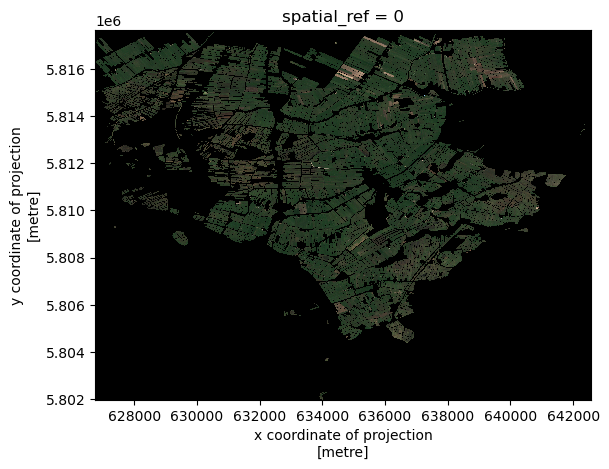

In [35]:
true_color_image_cropfield.plot.imshow()

In [39]:
true_color_image_clip.rio.to_raster("raster_clip.tif")

In [56]:
wells = gpd.read_file("data/brogmwvolledigeset.zip")

<AxesSubplot: >

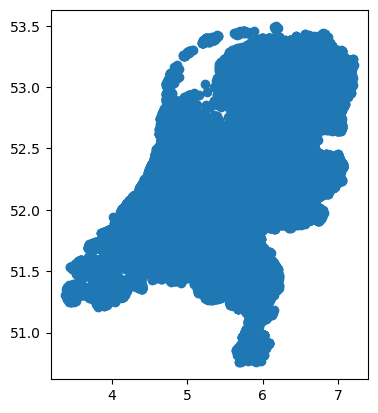

In [42]:
wells.plot()

In [45]:
wells.crs

<Geographic 2D CRS: EPSG:4258>
Name: ETRS89
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Europe - onshore and offshore: Albania; Andorra; Austria; Belgium; Bosnia and Herzegovina; Bulgaria; Croatia; Cyprus; Czechia; Denmark; Estonia; Faroe Islands; Finland; France; Germany; Gibraltar; Greece; Hungary; Ireland; Italy; Kosovo; Latvia; Liechtenstein; Lithuania; Luxembourg; Malta; Moldova; Monaco; Montenegro; Netherlands; North Macedonia; Norway including Svalbard and Jan Mayen; Poland; Portugal; Romania; San Marino; Serbia; Slovakia; Slovenia; Spain; Sweden; Switzerland; United Kingdom (UK) including Channel Islands and Isle of Man; Vatican City State.
- bounds: (-16.1, 32.88, 40.18, 84.73)
Datum: European Terrestrial Reference System 1989 ensemble
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [46]:
wells = wells.to_crs(true_color_image_clip.rio.crs)

In [48]:
xmin, ymin, xmax, ymax = true_color_image_clip.rio.bounds()

In [49]:
xmin

626750.0

In [52]:
true_color_image_clip['x'].min().values

array(626755.)

In [58]:
wells = wells.clip?

Signature: wells.clip(mask, keep_geom_type=False)
Docstring:
Clip points, lines, or polygon geometries to the mask extent.

Both layers must be in the same Coordinate Reference System (CRS).
The GeoDataFrame will be clipped to the full extent of the ``mask`` object.

If there are multiple polygons in mask, data from the GeoDataFrame will be
clipped to the total boundary of all polygons in mask.

Parameters
----------
mask : GeoDataFrame, GeoSeries, (Multi)Polygon, list-like
    Polygon vector layer used to clip the GeoDataFrame.
    The mask's geometry is dissolved into one geometric feature
    and intersected with GeoDataFrame.
    If the mask is list-like with four elements ``(minx, miny, maxx, maxy)``,
    ``clip`` will use a faster rectangle clipping
    (:meth:`~GeoSeries.clip_by_rect`), possibly leading to slightly different
    results.
keep_geom_type : boolean, default False
    If True, return only geometries of original type in case of intersection
    resulting in multiple 

<AxesSubplot: >

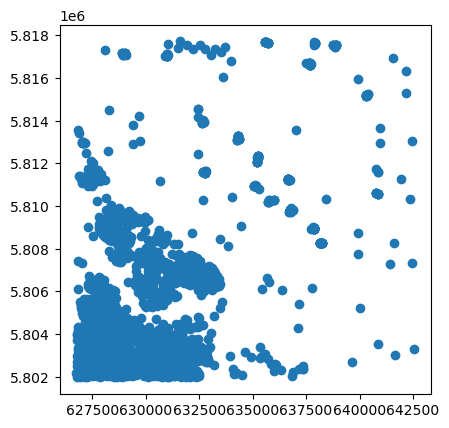

In [54]:
wells.plot()

In [57]:
wells.clip_by_rect(xmin, ymin, xmax, ymax)

0        GEOMETRYCOLLECTION EMPTY
1        GEOMETRYCOLLECTION EMPTY
2        GEOMETRYCOLLECTION EMPTY
3        GEOMETRYCOLLECTION EMPTY
4        GEOMETRYCOLLECTION EMPTY
                   ...           
54654    GEOMETRYCOLLECTION EMPTY
54655    GEOMETRYCOLLECTION EMPTY
54656    GEOMETRYCOLLECTION EMPTY
54657    GEOMETRYCOLLECTION EMPTY
54658    GEOMETRYCOLLECTION EMPTY
Length: 54659, dtype: geometry